In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sn
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [2]:
Airlines=pd.read_csv("G:/ExcelR_Data/Data_Science_Course/Assignments/Clustering/EastWestAirlines.csv")
Airlines.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [3]:
Airlines.isnull().sum()
#NO Null values are present

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [4]:
#Print the duplicated rows
Airlines[Airlines.duplicated()]
#No duplicate rows

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?


In [5]:
#Normalization Function
def norm_func(i):
    x=(i-i.min())/(i.max()-i.min())
    return x

In [6]:
#Normalized data frame
df_norm=norm_func(Airlines.iloc[:,1:])

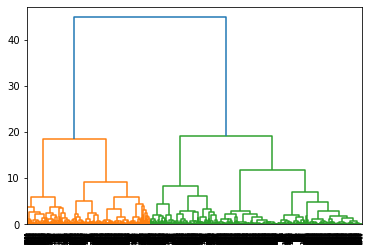

In [7]:
#Create Dendrogram
#dendrogram=sch.dendrogram(sch.linkage(df_norm,method='single'))
#dendrogram=sch.dendrogram(sch.linkage(df_norm,method='average'))
dendrogram=sch.dendrogram(sch.linkage(df_norm,method='ward'))

In [8]:
#Create clusters
hc=AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage='average')

In [9]:
#Save clusters for chart
y_hc=hc.fit_predict(df_norm)
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])

In [10]:
Airlines['clusterid']=hc.labels_

In [11]:
Airlines.head(10)

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusterid
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0
5,6,16420,0,1,1,1,0,0,0,0,6942,0,1
6,7,84914,0,3,1,1,27482,25,0,0,6994,0,1
7,8,20856,0,1,1,1,5250,4,250,1,6938,1,0
8,9,443003,0,3,2,1,1753,43,3850,12,6948,1,0
9,10,104860,0,3,1,1,28426,28,1150,3,6931,1,0


In [12]:
Clusters.head(10)

,Clusters
0,1
1,1
2,1
3,1
4,0
5,1
6,1
7,0
8,0
9,0


In [13]:
# getting aggregate mean of each cluster
Airlines.iloc[:,1:12].groupby(Airlines.clusterid).mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
clusterid,,,,,,,,,,,
0,9.586906e+04,240.069783,2.663279,1.015583,1.018293,28813.871274,15.626694,803.046070,2.459350,4629.832656,1.0
1,5.980784e+04,87.602462,1.705322,1.013900,1.008737,10227.689039,9.142971,226.292295,0.652502,3820.652105,0.0
2,1.704838e+06,0.000000,1.000000,1.000000,1.000000,17108.000000,32.000000,4823.000000,23.000000,7283.000000,1.0
3,1.319995e+05,347.000000,2.500000,1.000000,1.000000,65634.250000,69.250000,19960.000000,49.250000,2200.250000,1.0
